<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction and Retention Strategy Optimization**

 Customer churn refers to the percentage of customers who stop using a company’s services during a specific period.

# 1. Importing the Dependencies

In [50]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures

# Class Imbalance
from imblearn.over_sampling import SMOTE

# CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.metrics import classification_report

import pickle
warnings.filterwarnings(action="ignore")
%matplotlib inline

## 2. Loading Data and Understanding

In [119]:
# Load the uploaded dataset
customer_churn = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [120]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## DATA CLEANING

In [121]:
# Drop unnesecary columns
customer_churn.drop(columns=['customerID'], inplace=True)

In [122]:
customer_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [123]:
#printing unique values in all the columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in customer_churn.columns:
    if col not in numerical_features:
      print(col, customer_churn[col].unique())
      print("_"*50)

gender ['Female' 'Male']
__________________________________________________
SeniorCitizen [0 1]
__________________________________________________
Partner ['Yes' 'No']
__________________________________________________
Dependents ['No' 'Yes']
__________________________________________________
PhoneService ['No' 'Yes']
__________________________________________________
MultipleLines ['No phone service' 'No' 'Yes']
__________________________________________________
InternetService ['DSL' 'Fiber optic' 'No']
__________________________________________________
OnlineSecurity ['No' 'Yes' 'No internet service']
__________________________________________________
OnlineBackup ['Yes' 'No' 'No internet service']
__________________________________________________
DeviceProtection ['No' 'Yes' 'No internet service']
__________________________________________________
TechSupport ['No' 'Yes' 'No internet service']
__________________________________________________
StreamingTV ['No' 'Yes' 'No internet 

In [124]:
customer_churn[customer_churn['TotalCharges'] ==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [125]:
len(customer_churn[customer_churn['TotalCharges'] ==" "])

11

In [126]:
customer_churn["TotalCharges"] = customer_churn["TotalCharges"].replace({" ": "0.0"})

In [127]:
#Convert TotalCharges to numeric:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)

In [128]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [129]:
#checking the distribution of target column
print(customer_churn['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights**
1. Removed customer ID as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the Total Charges column were replaced with 0
4. Class imbalanced identified in the target

## 3. Exploratory Data Analysis (EDA)

In [24]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Numerical Features Analysis

Understanding the distribution of numerical features

In [30]:
def plot_histograms(customer_churn, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(customer_churn[column_name], kde=True)
  plt.title(f'Distribution of {column_name}')

  #calculate mean and median used for the columns
  col_mean = customer_churn[column_name].mean()
  col_median = customer_churn[column_name].median()

  #Add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

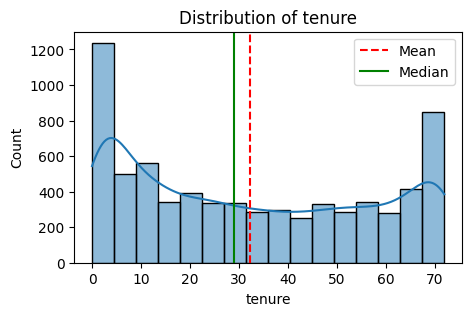

In [31]:
plot_histograms(customer_churn, "tenure")

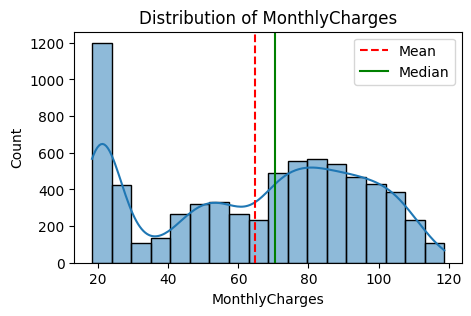

In [32]:
plot_histograms(customer_churn, "MonthlyCharges")

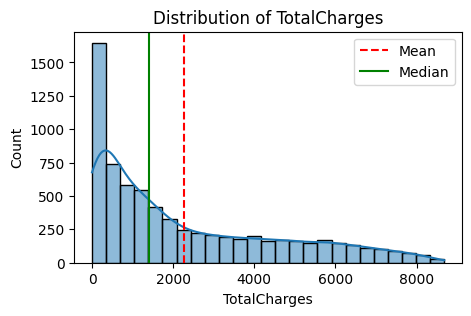

In [33]:
plot_histograms(customer_churn, "TotalCharges")

### Box plot for numerical columns

In [39]:
def plot_boxplot(customer_churn, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=customer_churn[column_name])
  plt.title(f'Box Plot of {column_name}')
  plt.ylabel(column_name)
  plt.show()

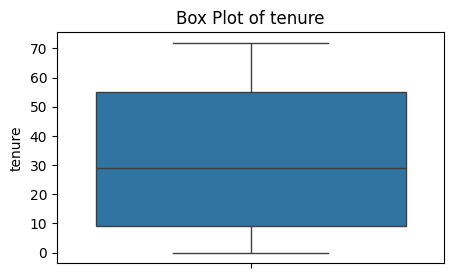

In [40]:
plot_boxplot(customer_churn, "tenure")

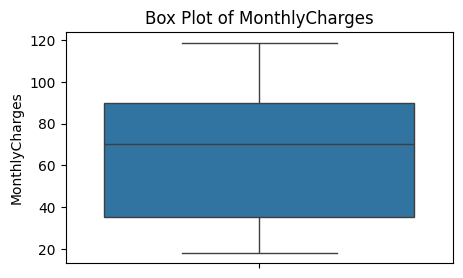

In [41]:
plot_boxplot(customer_churn, "MonthlyCharges")

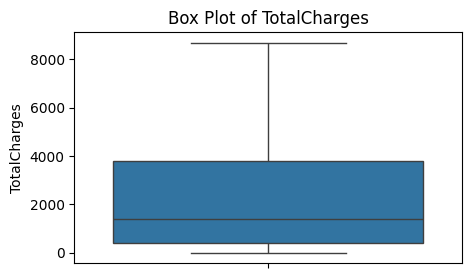

In [42]:
plot_boxplot(customer_churn, "TotalCharges")

**Correlation heatmap for numerical columns**

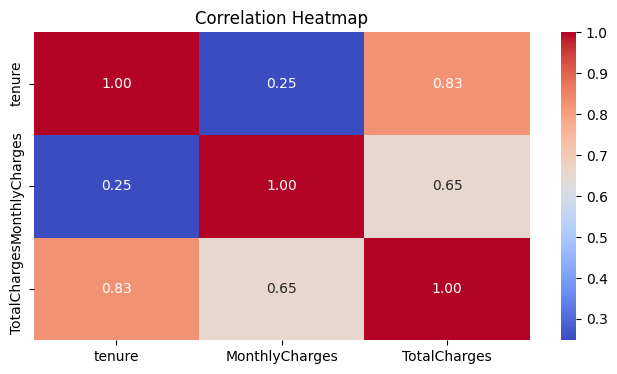

In [44]:
#Correlation matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(customer_churn[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Categorical Features Analysis**

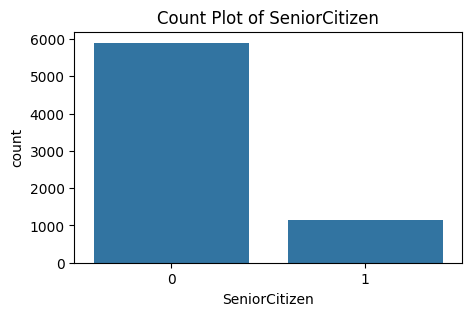

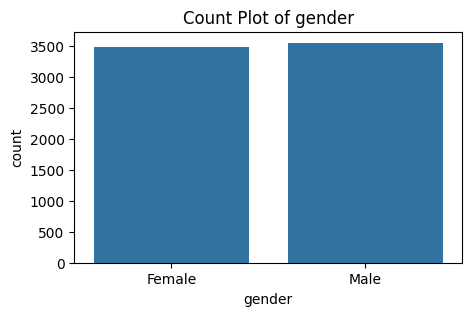

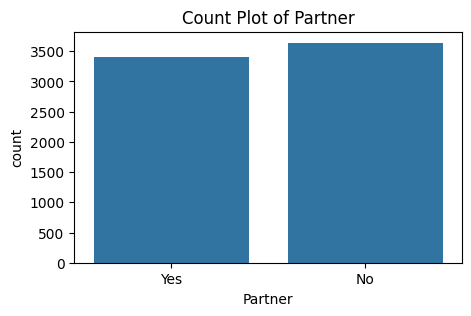

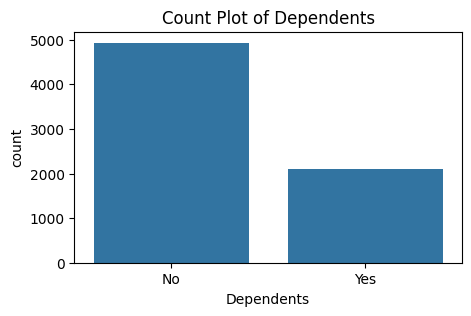

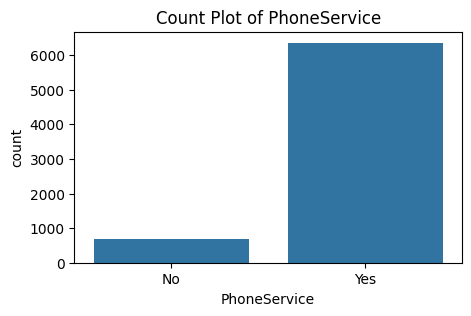

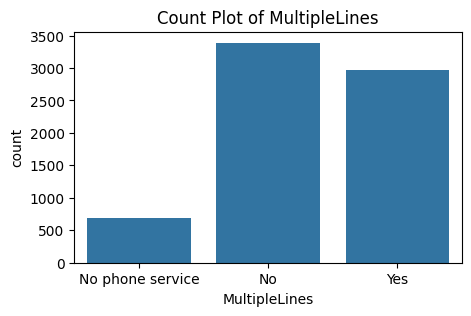

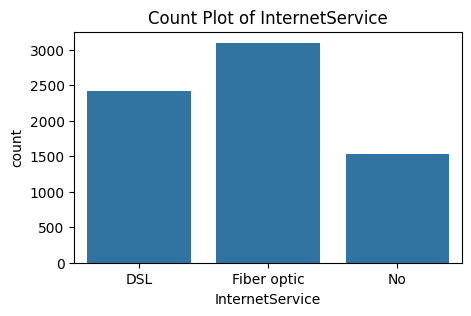

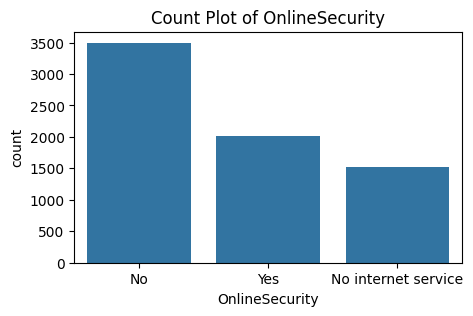

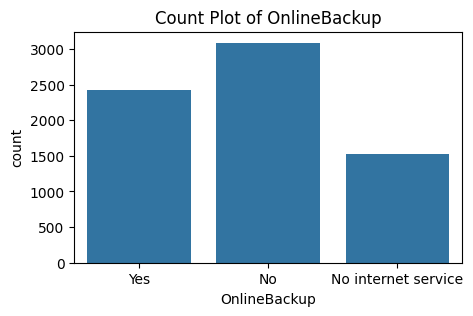

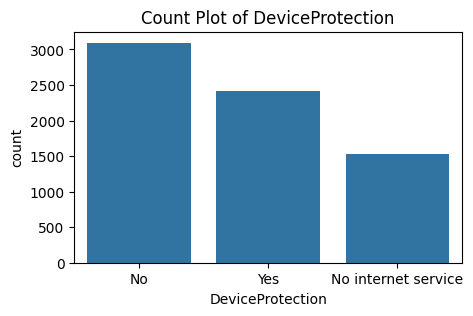

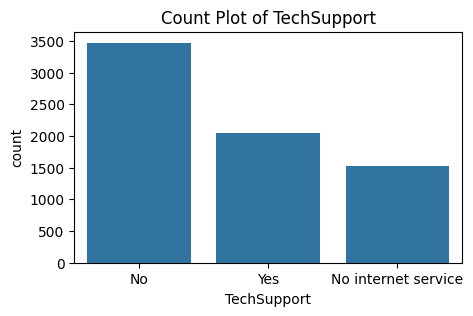

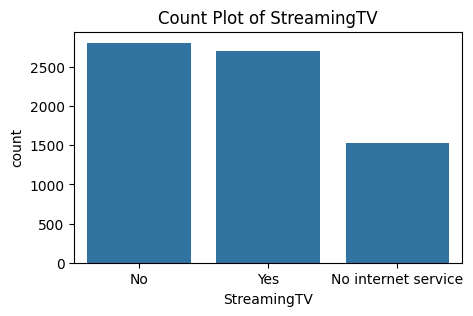

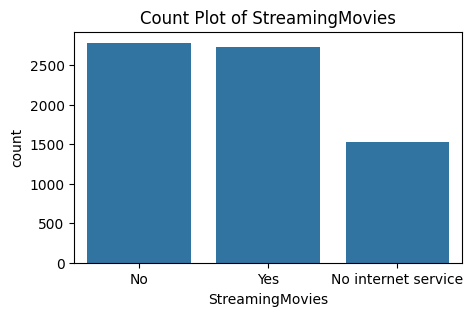

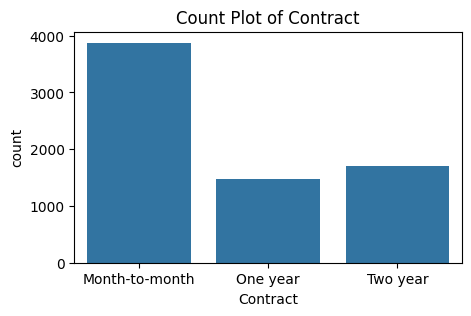

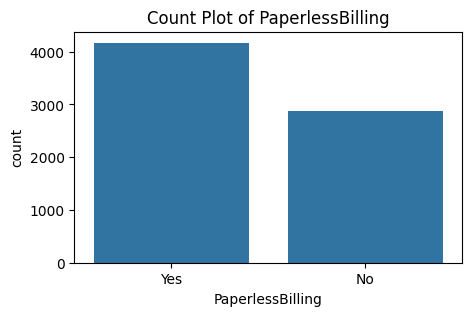

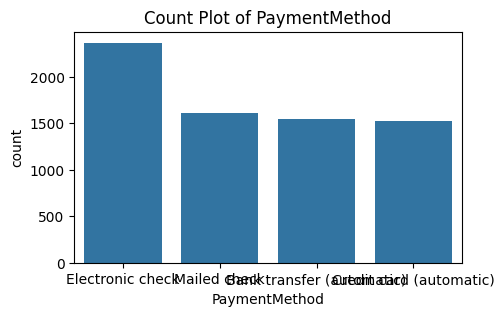

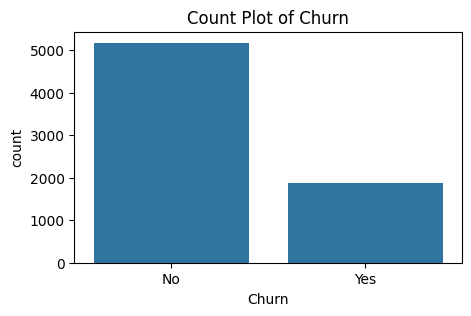

In [47]:
object_cols = customer_churn.select_dtypes(include=['object']).columns.tolist()
object_cols = ["SeniorCitizen"] + object_cols
# object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=customer_churn[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

### Pairplot for selected features and the target variable

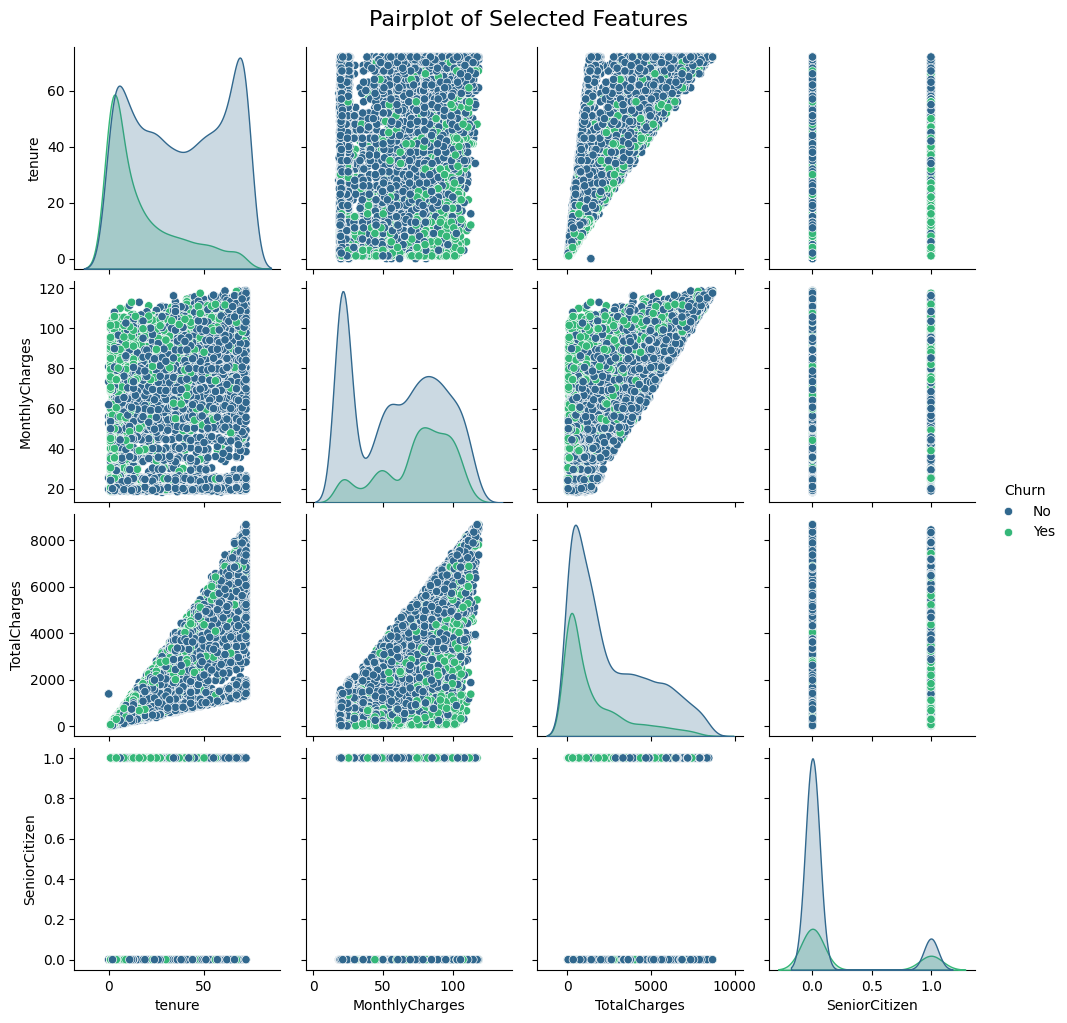

In [ ]:
selected_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents']
sns.pairplot(customer_churn[selected_features + ['Churn']], hue='Churn', palette="viridis", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", fontsize=16, y=1.02)
plt.show()

Churn
No     5174
Yes    1869
Name: count, dtype: int64


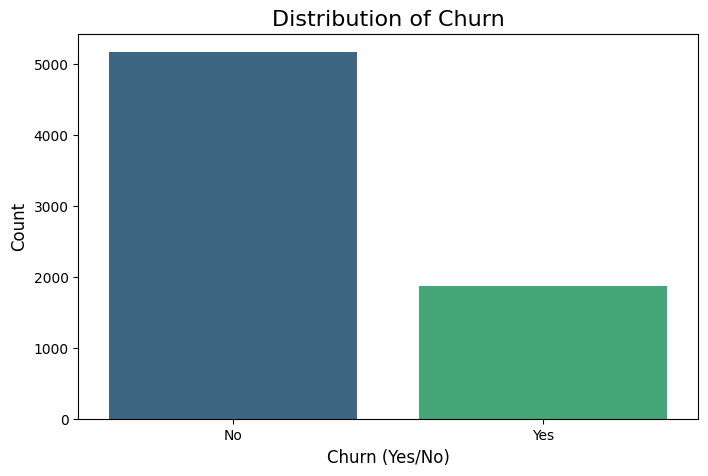

In [ ]:
# Check the value counts for the 'Churn' column
churn_counts = customer_churn['Churn'].value_counts()
print(churn_counts)

# Bar plot to visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_churn, x='Churn', palette="viridis")
plt.title("Distribution of Churn", fontsize=16)
plt.xlabel("Churn (Yes/No)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## 4. Data Prepocessing

### Encode Categorical Variables

#### Label encoding for target variable

In [130]:
customer_churn['Churn'] = customer_churn['Churn'].replace({'Yes': 1, 'No': 0})

In [131]:
customer_churn['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


#### One-hot encoding for categorical features

In [132]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Apply one-hot encoding
customer_churn_encoded = pd.get_dummies(customer_churn, columns=categorical_cols, drop_first=True)

# Check the data types again
print(customer_churn_encoded.dtypes)

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

In [133]:
# Convert boolean columns to integers (0 or 1)
customer_churn_encoded = customer_churn_encoded.astype(int)

# Check the data types again to confirm the conversion
print(customer_churn_encoded.dtypes)

SeniorCitizen                            int64
tenure                                   int64
MonthlyCharges                           int64
TotalCharges                             int64
Churn                                    int64
gender_Male                              int64
Partner_Yes                              int64
Dependents_Yes                           int64
PhoneService_Yes                         int64
MultipleLines_No phone service           int64
MultipleLines_Yes                        int64
InternetService_Fiber optic              int64
InternetService_No                       int64
OnlineSecurity_No internet service       int64
OnlineSecurity_Yes                       int64
OnlineBackup_No internet service         int64
OnlineBackup_Yes                         int64
DeviceProtection_No internet service     int64
DeviceProtection_Yes                     int64
TechSupport_No internet service          int64
TechSupport_Yes                          int64
StreamingTV_N

In [135]:
customer_churn_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


###Normalize/Scale Numerical Columns

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_churn_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(customer_churn_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']])

### **Training and Test Data Split**

In [144]:
#spliting the features and target
X = customer_churn_encoded.drop('Churn', axis=1)
y = customer_churn_encoded['Churn']

In [145]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Verify the shape of the split data
print(f"X_train shape: {X_train.shape}")

X_train shape: (5634, 30)


In [147]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


### Handle Imbalanced Data
 Synthetic Minority Oversampling Technique (SMOTE)

In [148]:
# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## 5. Model Training

In [149]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [150]:
# Train the model on SMOTE-resampled data
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

### Make Predictions

In [151]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

## 6. Model Evaluation

In [154]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[850 186]
 [139 234]]
Accuracy: 0.7693399574166075


NameError: name 'precision_score' is not defined

### Feature Importance

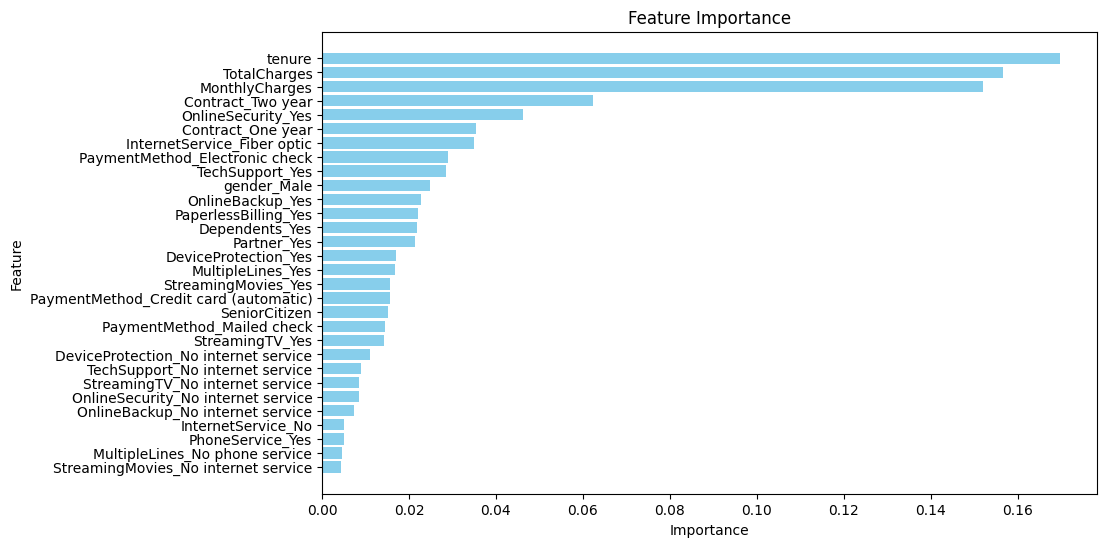

In [153]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## 7. Load the saved model and build a predictive system

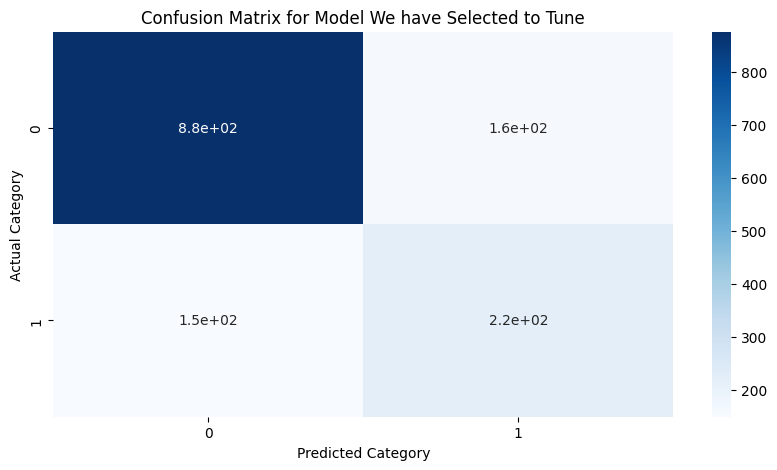

array([[876, 160],
       [150, 223]])

In [116]:
matrix = confusion_matrix(y_test, yhat)

#Visualise the matrix
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Model We have Selected to Tune")
plt.show()

matrix

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 500],
    'randomforestclassifier__max_depth': [10, 20, None],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")